## Proyecto 1: Modelos de Regresión Lineal
#### Gabriela Mazariegos - 22513 
#### Giovanni Santos - 22523
#### Santiago Pereira - 22318

### Análisis Exploratorio

##### Con el propósito de entender mejor los datos del conjunto de datos y lograr predecir el precio de los inmuebles, podemos hacer un análisis exploratorio 

#### Importar las librerías a utilizar

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split





%matplotlib inline

#### Leer archivo de datos

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


#### Para ver información general del dataset podemos utilizar head, info y describe. 

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Podemos observar una serie de características sobre el data set. Primero, que el data set tiene 81 columnas y 1460 datos. Además, nos damos cuenta de la columna que nos interesa principalmente para nuestra predicción es SalePrice que indica el precio de venta de la propiedad en dolares y, por lo tanto, es la variable objetivo. Podemos ver que el precio minimo de una casa no es de 0, por lo que no hay que tomarlo en cuenta. Mediante info nos damos cuenta que cada casa tiene características diferentes, como que no todas tienen piscina, y que hay valores faltantes para múltiples casas. 

Podemos seguir el análisis al idear una serie de preguntas sobre lo que nos parece interesante investigar. Ya respondimos cuestiones como si hay datos faltantes o cual es la variable objetivo. En consecuencia, nos podemos preguntar, ¿Cómo se distribuye el precio de las viviendas?

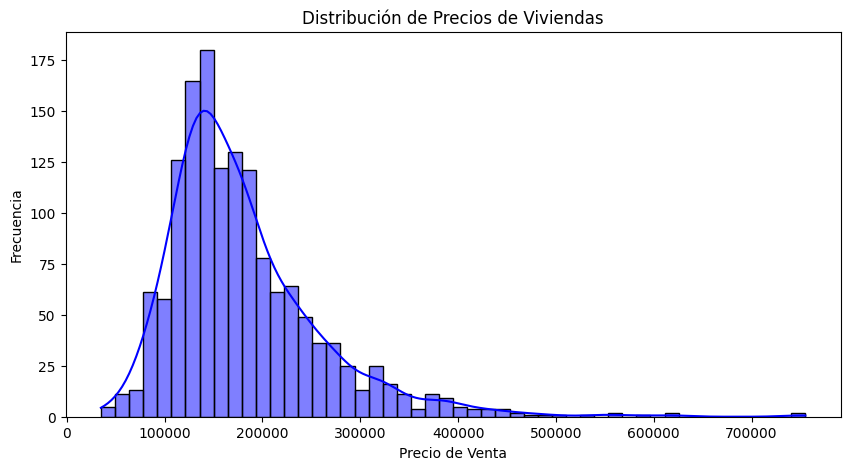

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice"], bins=50, kde=True, color='blue')
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Viviendas")
plt.show()

Podemos observar que el precio de venta con mayor frecuencia está entre 100000 y 200000 dolares y que se tiene una asimetría positiva. Para seguir con el análisis, podemos pensar cuáles son las otras variables que nos interesan y cuál es su relación con SalePrice. Para hacerlo, podemos ver como factores como el tamaño de la casa, la calidad de vivienda y el año de construcción influyen en el precio. Se nota que calidad de vivienda influye directamente en el precio, siendo las de mayor calidad las que más tienen precio de venta. Por otro lado, el tamaño de la casa influye en el incremento del precio, pero se tienen outliers en donde no siempre sucede que tenemos que manejar más adelante. Adicionalmente, se observa que las viviendas con precio más alto son las más recientes. 


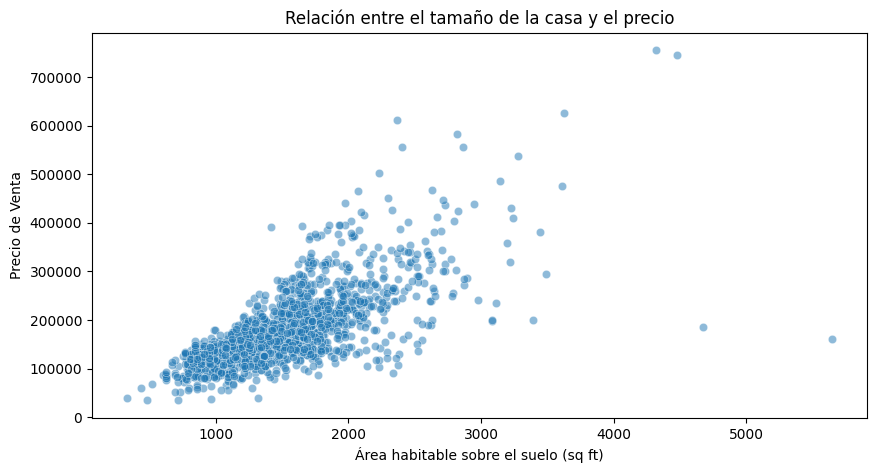

C:\Users\brand\AppData\Local\Temp\ipykernel_26412\2311372623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")


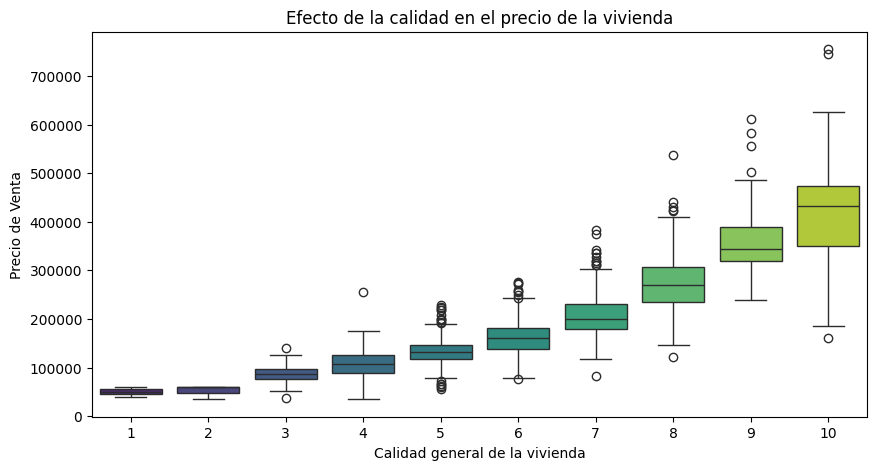

C:\Users\brand\AppData\Local\Temp\ipykernel_26412\2311372623.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")


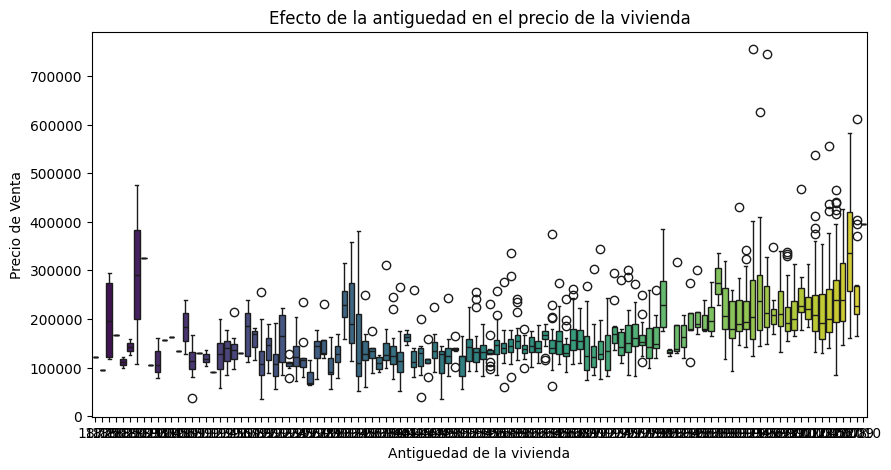

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Calidad general de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la calidad en el precio de la vivienda")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Antiguedad de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la antiguedad en el precio de la vivienda")
plt.show()



Para confirmar esto podemos ver la correlación de variables con el precio, esto se puede hacer mediante un mapa de calor. Al ver las 10 variables que tienen mayor correlación con el precio de venta de la vivienda podemos observar que factores que no habíamos analizado antes como Garage y Total Rooms Above Grade son importantes. 

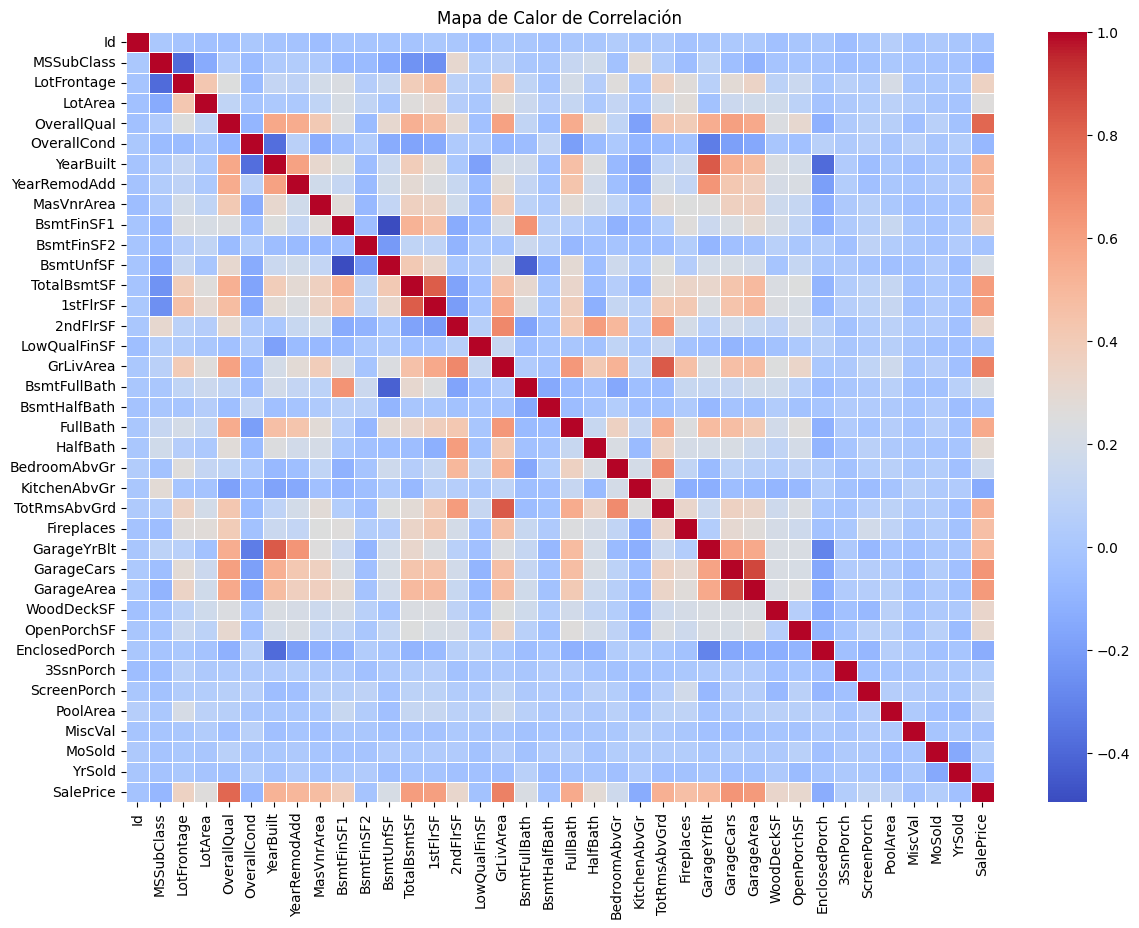

In [8]:
numeric_cols = df_train.select_dtypes(include=["number"])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


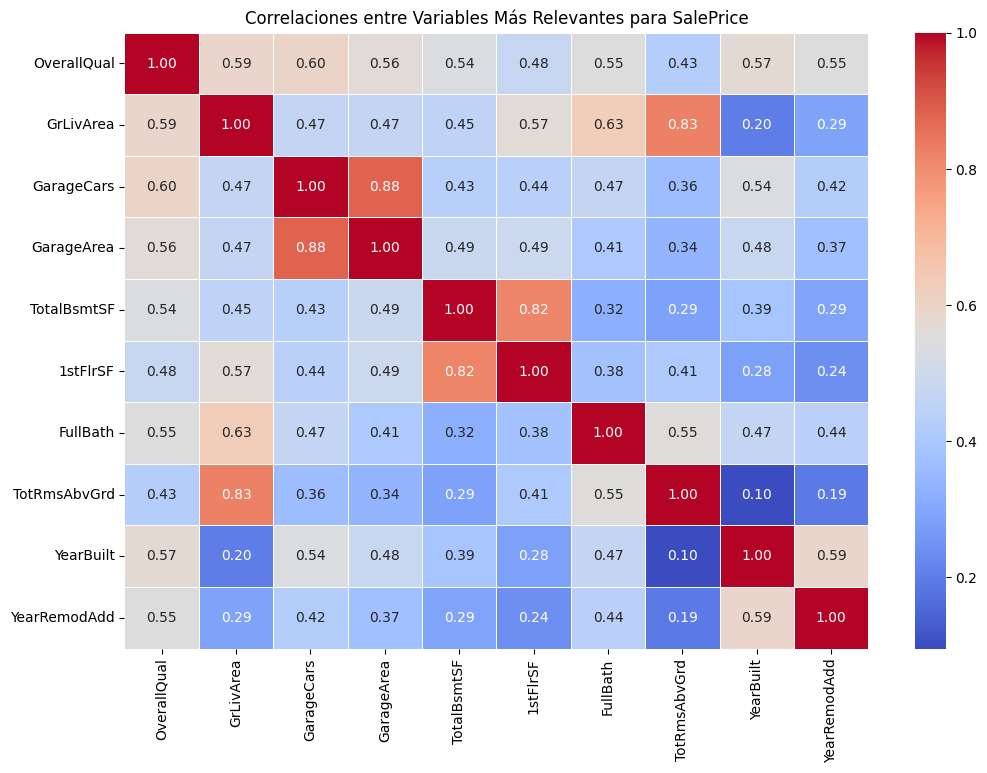

In [9]:
correlation = numeric_cols.corr()["SalePrice"].sort_values(ascending=False)
high_corr_vars = correlation[1:11].index  
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols[high_corr_vars].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlaciones entre Variables Más Relevantes para SalePrice")
plt.show()

Algo que nos puede servir es tener la distribución de las variables que nos pueden interesar en el futuro. 

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

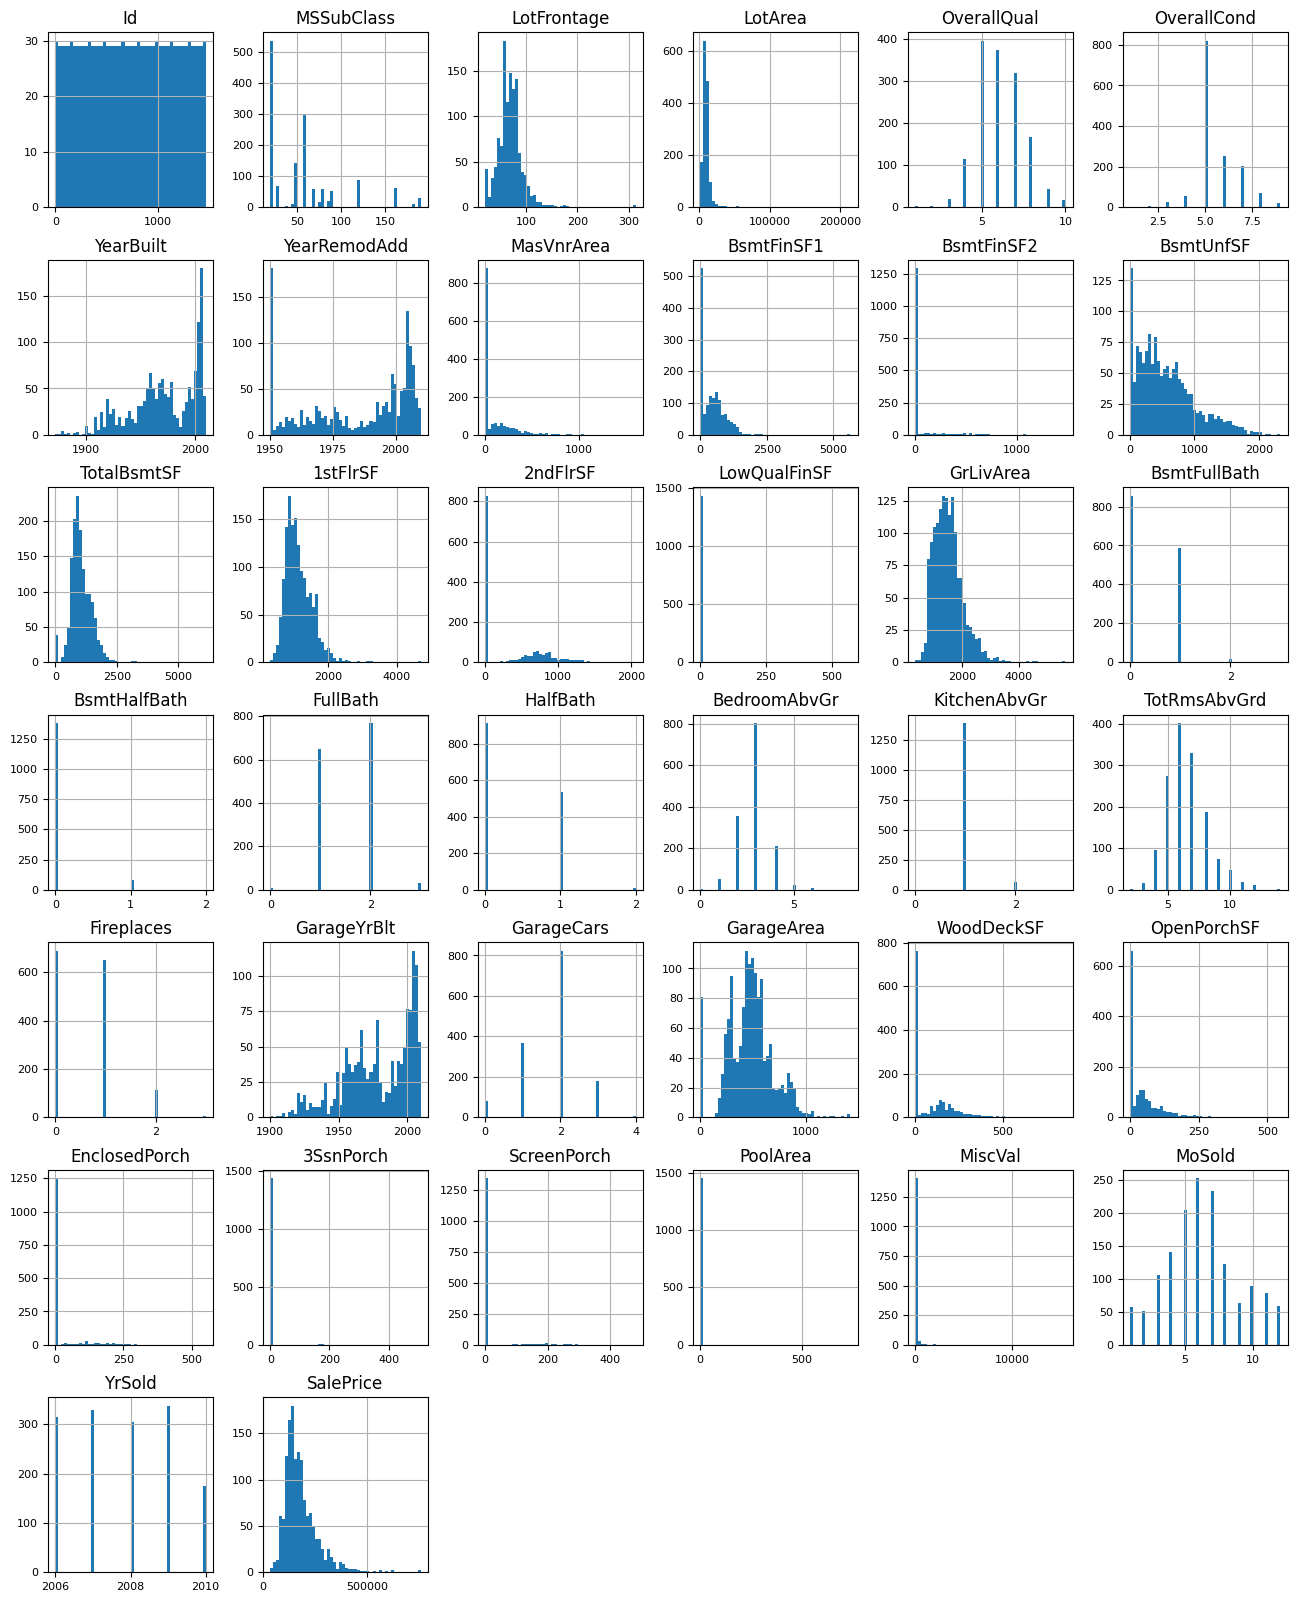

In [10]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Ahora debemos dividir el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba, para hacerlo hay que empezar el pre procesamiento de datos. Como sabemos que hay datos faltantes, podemos observar cual es el total de estos y después hacer una decisión sobre cuales eliminar. 

In [11]:
train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=42)

In [12]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
MasVnrType       683
FireplaceQu      547
LotFrontage      217
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtCond          28
BsmtFinType1      28
BsmtExposure      28
BsmtQual          28
BsmtFinType2      28
MasVnrArea         6
Electrical         1
dtype: int64


Podemos eliminar todos los datos faltantes ya que no tienen correlación importante con SalePrice

In [13]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)
train_set = train_set.drop(columns=missing_values.index)
print("\nResultado:")
print(train_set.columns)

Valores faltantes por columna:
PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
MasVnrType       683
FireplaceQu      547
LotFrontage      217
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtCond          28
BsmtFinType1      28
BsmtExposure      28
BsmtQual          28
BsmtFinType2      28
MasVnrArea         6
Electrical         1
dtype: int64

Resultado:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',

Ahora podemos aplicar el escalamiento de características, específicamente, al estandarizar los valores de SalePrice. Primero, observamos que teníamos outliers que tenemos que eliminar. Después, podemos proceder a estandarizar SalePrice. En consiguiente, podemos hacer un gráfico de probabilidad para verificar si tiene una distribución normal. 

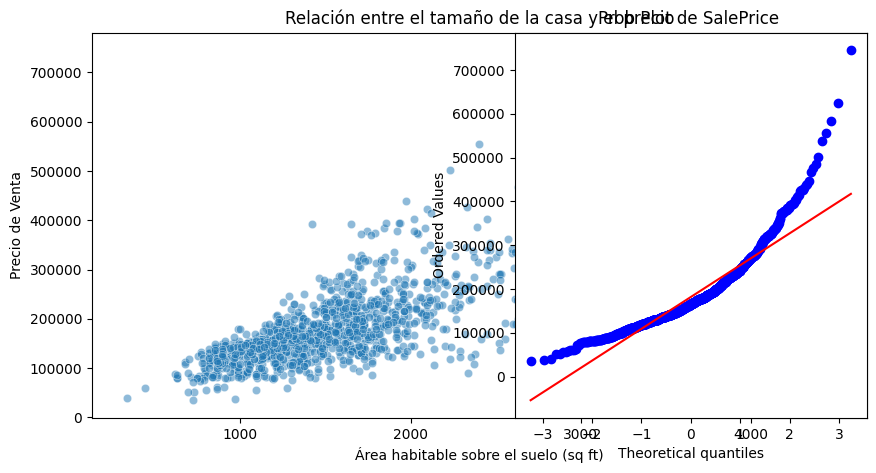

In [14]:
train_set = train_set.drop(train_set[(train_set['GrLivArea']>4000) & (train_set['SalePrice']<200000)].index)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train_set["GrLivArea"], y=train_set["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")

plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()

Como no tiene la distribución que queremos, podemos aplicar una transformación logarítmica y luego realizar la estandarización de SalePrice. 

In [15]:
train_set["SalePrice"] = np.log1p(train_set["SalePrice"])

scaler = StandardScaler()
train_set["SalePrice"] = scaler.fit_transform(train_set[["SalePrice"]])


Podemos verificarlo al mostrar de nuevo el gráfico de probabilidad. Este nos muestra que ahora tenemos una distribución normal en su mayoría. 

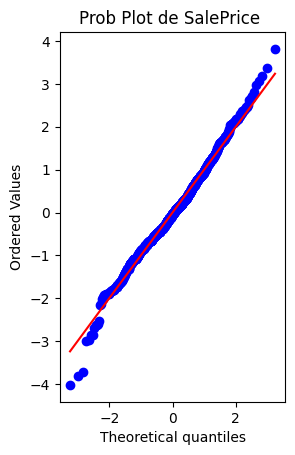

In [16]:
plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()

C:\Users\brand\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\brand\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _wi

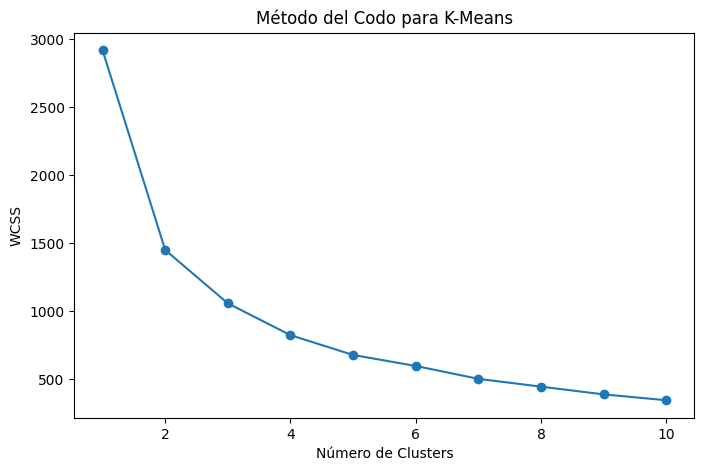

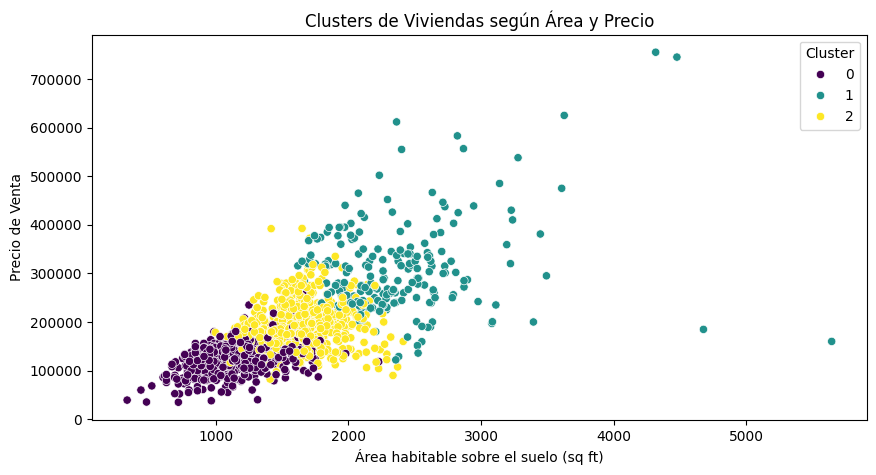

In [17]:
X_cluster = df_train[["GrLivArea", "OverallQual"]].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método del Codo para K-Means")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_train["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"], hue=df_train["Cluster"], palette="viridis")
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Clusters de Viviendas según Área y Precio")
plt.show()


### Todos los resultados deben ser reproducibles por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          4.52e-223
Time:                        01:47:14   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

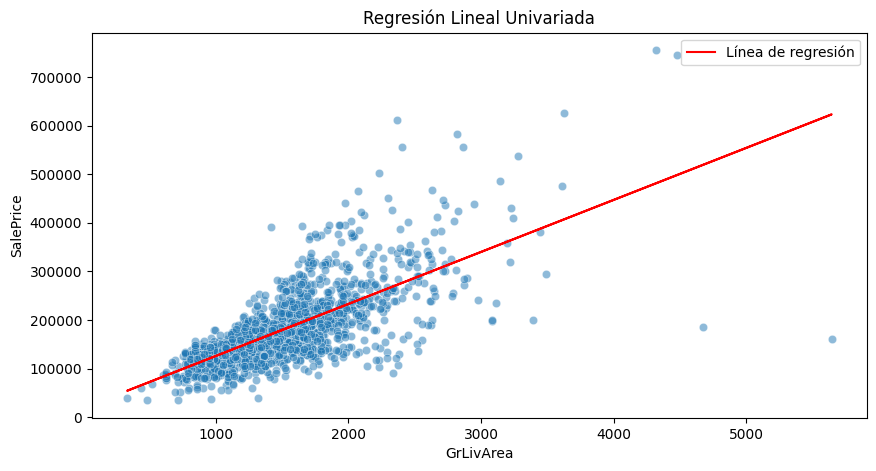

In [18]:

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

variable_univariada = "GrLivArea"

X = df_train[[variable_univariada]]  
y = df_train["SalePrice"]  


X = sm.add_constant(X)

modelo_univariado = sm.OLS(y, X).fit()


print(modelo_univariado.summary())

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train[variable_univariada], y=df_train["SalePrice"], alpha=0.5)
plt.plot(df_train[variable_univariada], modelo_univariado.predict(X), color="red", label="Línea de regresión")
plt.xlabel(variable_univariada)
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()


### Seleccione una de las variables y haga un modelo univariado de regresión lineal para predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la predicción). Muéstrelo gráficamente.

Valores NaN en el dataset antes de limpiar:
348
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:47:14   Log-Likelihood:                -13316.
No. Observations:                1121   AIC:                         2.671e+04
Df Residuals:                    1084   BIC:                         2.689e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

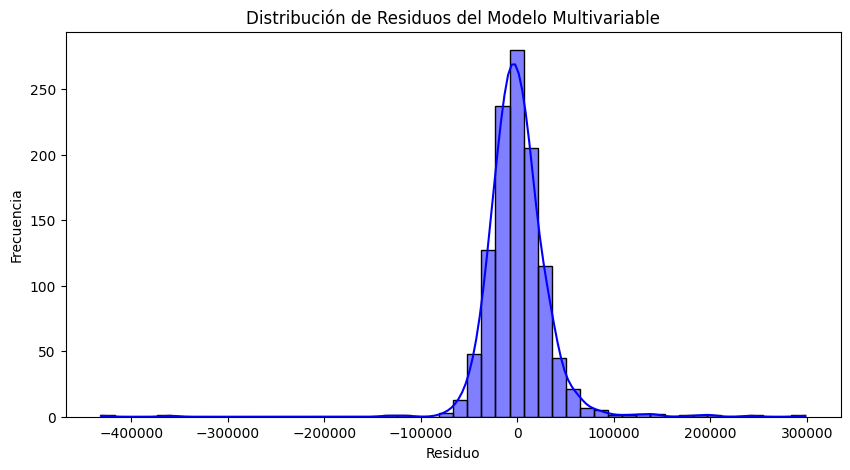

In [19]:
X_multi = df_train.select_dtypes(include=["number"]).drop(columns=["SalePrice"])

X_multi = sm.add_constant(X_multi)

print("Valores NaN en el dataset antes de limpiar:")
print(X_multi.isnull().sum().sum())  

X_multi = X_multi.dropna()
y = y.loc[X_multi.index]  

X_multi.replace([np.inf, -np.inf], np.nan, inplace=True)

X_multi = X_multi.dropna()
y = y.loc[X_multi.index]  

modelo_multivariable = sm.OLS(y, X_multi).fit()

print(modelo_multivariable.summary())

plt.figure(figsize=(10, 5))
sns.histplot(modelo_multivariable.resid, bins=50, kde=True, color='blue')
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos del Modelo Multivariable")
plt.show()


### Haga un modelo de regresión lineal con todas las variables numéricas para predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la predicción). Muestre el modelo gráficamente.

Calculando VIF para detectar multicolinealidad...
         Variable           VIF
16   LowQualFinSF           inf
17      GrLivArea           inf
14       1stFlrSF           inf
11     BsmtFinSF2           inf
12      BsmtUnfSF           inf
13    TotalBsmtSF           inf
10     BsmtFinSF1           inf
15       2ndFlrSF           inf
0           const  2.396274e+06
7       YearBuilt  6.094865e+00
24   TotRmsAbvGrd  4.638212e+00
26    GarageYrBlt  4.573108e+00
28     GarageArea  4.484547e+00
27     GarageCars  4.317158e+00
5     OverallQual  3.813052e+00
20       FullBath  3.304409e+00
8    YearRemodAdd  2.754775e+00
22   BedroomAbvGr  2.291294e+00
21       HalfBath  2.284648e+00
18   BsmtFullBath  2.222126e+00
38        Cluster  1.848446e+00
3     LotFrontage  1.828361e+00
6     OverallCond  1.771774e+00
2      MSSubClass  1.718888e+00
25     Fireplaces  1.612985e+00
23   KitchenAbvGr  1.602898e+00
9      MasVnrArea  1.487080e+00
4         LotArea  1.356344e+00
31  EnclosedPorch  1.3

C:\Users\brand\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


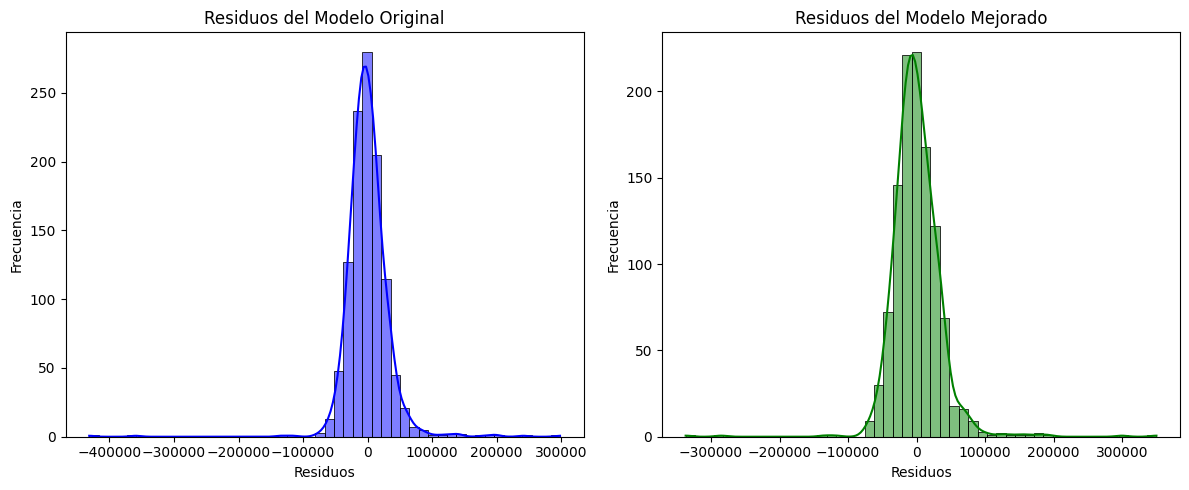

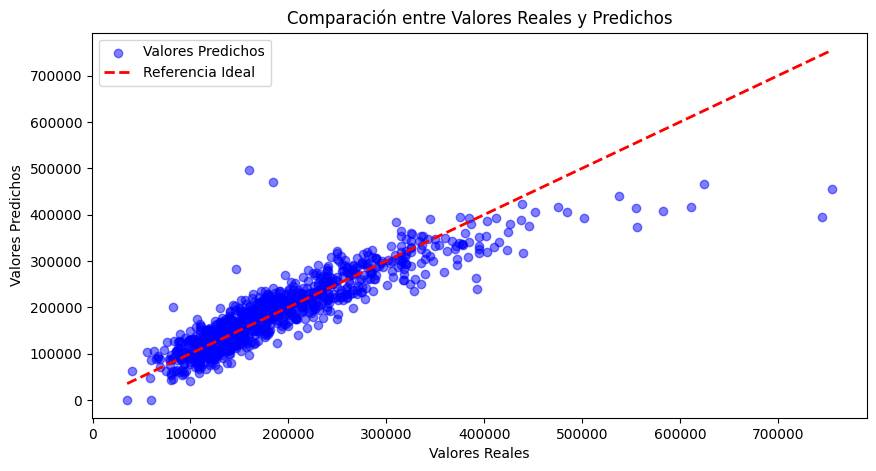

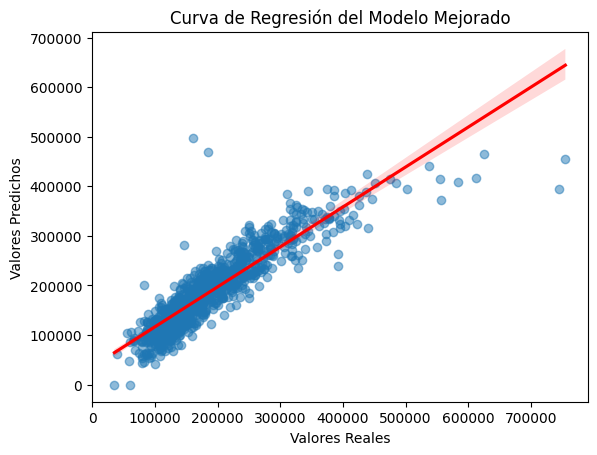

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("Calculando VIF para detectar multicolinealidad...")
vif_inicial = calcular_vif(X_multi)
print(vif_inicial.sort_values(by="VIF", ascending=False))

variables_reducidas = vif_inicial[vif_inicial["VIF"] < 10]["Variable"].tolist()

if "const" not in variables_reducidas:
    variables_reducidas.insert(0, "const")

X_reducido = X_multi[variables_reducidas]

modelo_mejorado = sm.OLS(y, X_reducido).fit()

print(modelo_mejorado.summary())

y_pred = modelo_mejorado.predict(X_reducido)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"\nEvaluación del Modelo Mejorado:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(modelo_multivariable.resid, bins=50, kde=True, color="blue")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Residuos del Modelo Original")

plt.subplot(1, 2, 2)
sns.histplot(modelo_mejorado.resid, bins=50, kde=True, color="green")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Residuos del Modelo Mejorado")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, alpha=0.5, color="blue", label="Valores Predichos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="dashed", lw=2, label="Referencia Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

sns.regplot(x=y, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Curva de Regresión del Modelo Mejorado")
plt.show()

### Analice el modelo. Determine si hay multicolinealidad entre las variables, y cuáles son las que aportan al modelo. Haga un análisis de correlación de las características del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no. En caso de existir sobreajuste, haga otro modelo que lo corrija.


 Análisis de Multicolinealidad: Factor de Inflación de Varianza (VIF)
         Variable           VIF
0           const  2.392590e+06
7       YearBuilt  5.324994e+00
18    GarageYrBlt  4.473845e+00
20     GarageArea  4.330484e+00
19     GarageCars  4.264386e+00
16   TotRmsAbvGrd  3.480299e+00
5     OverallQual  3.387168e+00
12       FullBath  2.832124e+00
8    YearRemodAdd  2.673021e+00
14   BedroomAbvGr  2.188128e+00
30        Cluster  1.823649e+00
3     LotFrontage  1.784266e+00
6     OverallCond  1.725026e+00
2      MSSubClass  1.537113e+00
15   KitchenAbvGr  1.509685e+00
17     Fireplaces  1.508978e+00
13       HalfBath  1.500893e+00
9      MasVnrArea  1.402627e+00
4         LotArea  1.319388e+00
23  EnclosedPorch  1.304113e+00
10   BsmtFullBath  1.268639e+00
22    OpenPorchSF  1.257231e+00
21     WoodDeckSF  1.219141e+00
25    ScreenPorch  1.140418e+00
26       PoolArea  1.134019e+00
27        MiscVal  1.096137e+00
11   BsmtHalfBath  1.084394e+00
28         MoSold  1.060951e+00
2

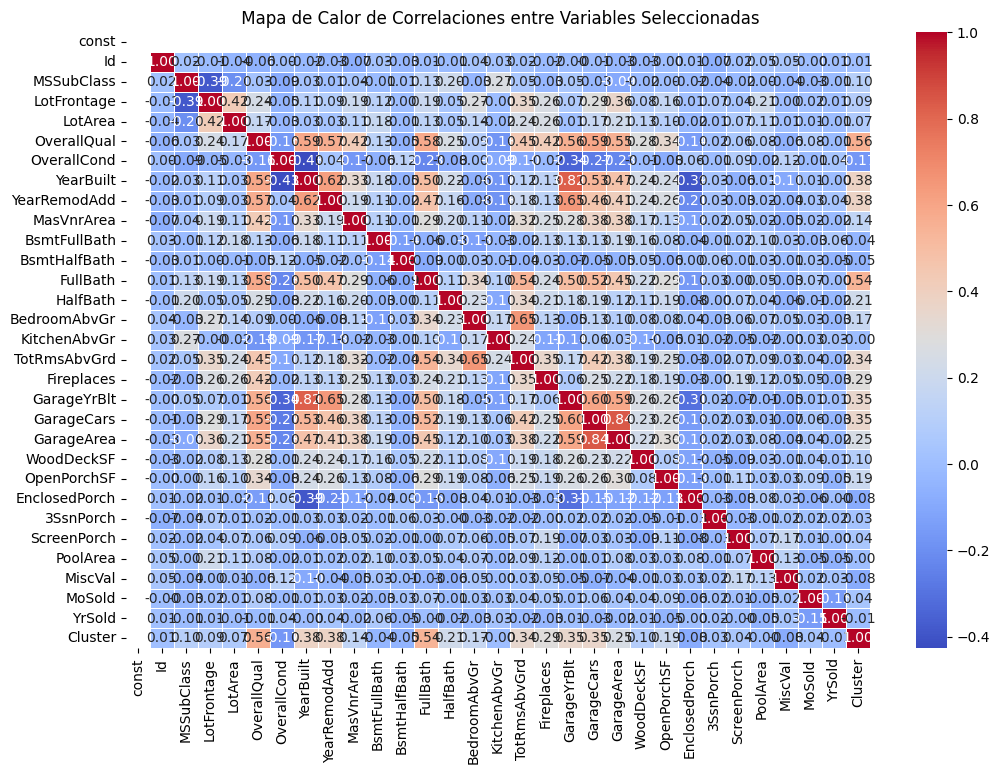


 Evaluación del Modelo en Entrenamiento:
MAE: 23810.61
MSE: 1286266599.98
RMSE: 35864.56
R²: 0.8053

 Evaluación del Modelo en Prueba:
MAE: 24575.15
MSE: 1649238657.91
RMSE: 40610.82
R²: 0.7909

 No sobreajuste en el modelo.


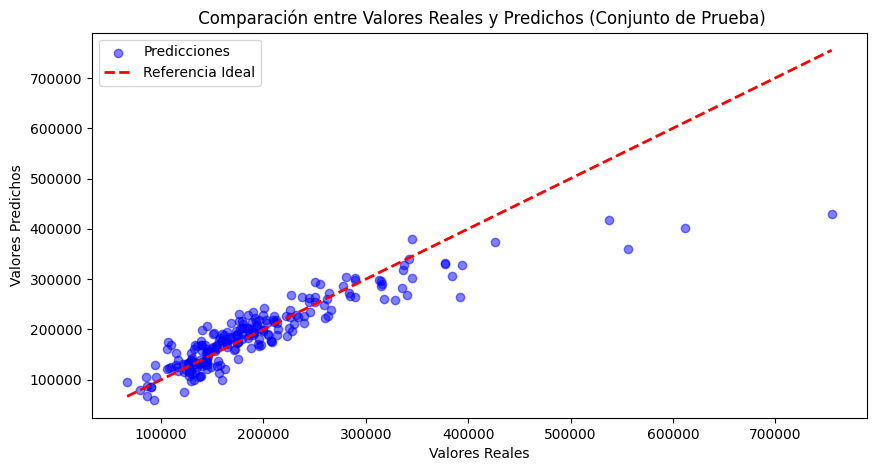

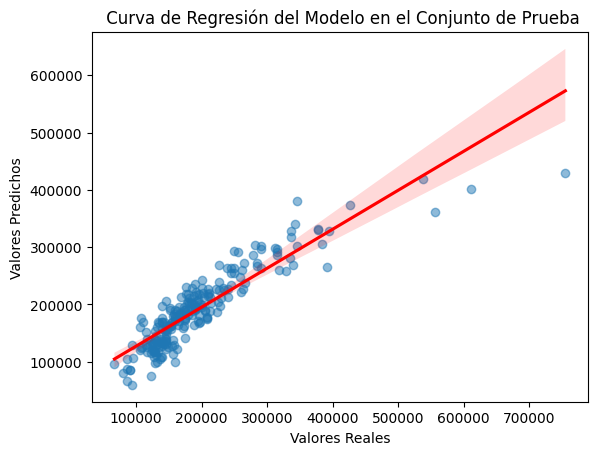

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n Análisis de Multicolinealidad: Factor de Inflación de Varianza (VIF)")
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reducido.columns
vif_data["VIF"] = [variance_inflation_factor(X_reducido.values, i) for i in range(X_reducido.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(X_reducido.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title(" Mapa de Calor de Correlaciones entre Variables Seleccionadas")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo_final = sm.OLS(y_train, X_train).fit()

y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n Evaluación del Modelo en Entrenamiento:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.4f}")

print("\n Evaluación del Modelo en Prueba:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.4f}")

if abs(r2_train - r2_test) > 0.1:
    print("\n El modelo presenta signos de sobreajuste. Se ajustará un nuevo modelo con menos variables.")

    variables_ajustadas = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()

    if "const" not in variables_ajustadas:
        variables_ajustadas.insert(0, "const")

    X_train_reducido = X_train[variables_ajustadas]
    X_test_reducido = X_test[variables_ajustadas]

    modelo_corregido = sm.OLS(y_train, X_train_reducido).fit()

    y_pred_test_corregido = modelo_corregido.predict(X_test_reducido)

    r2_test_corregido = r2_score(y_test, y_pred_test_corregido)

    print("\n Evaluación del Modelo Corregido:")
    print(f"R² en Prueba: {r2_test_corregido:.4f}")

    if r2_test_corregido > r2_test:
        print("El nuevo modelo tiene un mejor ajuste y menos sobreajuste.")

else:
    print("\n No sobreajuste en el modelo.")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed", lw=2, label="Referencia Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(" Comparación entre Valores Reales y Predichos (Conjunto de Prueba)")
plt.legend()
plt.show()

sns.regplot(x=y_test, y=y_pred_test, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(" Curva de Regresión del Modelo en el Conjunto de Prueba")
plt.show()


Inicialmente se presentó problemas de overfitting en el modelo, esto provocado por mucha cantidad de datos redundantes. Esto se corrigió eliminando variables con alta colinealidad y baja significancia. De este modo se pudo obtener un modelo con mejores predicciones y mayor capacidad.

### 10.	Si tiene multicolinealidad o sobreajuste, haga un modelo con las variables que sean mejores predictoras del precio de las casas. Determine la calidad del modelo realizando un análisis de los residuos. Muéstrelo gráficamente.

C:\Users\brand\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


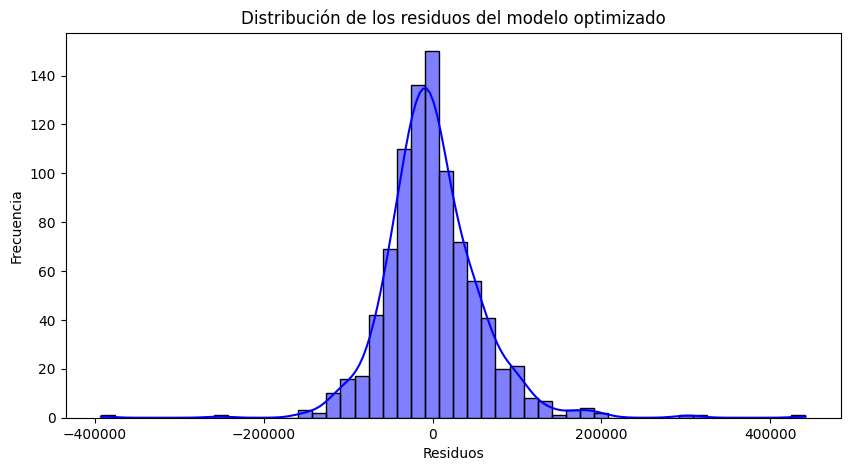

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     55.01
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          2.01e-120
Time:                        01:47:16   Log-Likelihood:                -11090.
No. Observations:                 896   AIC:                         2.221e+04
Df Residuals:                     879   BIC:                         2.230e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.155e+05   7618.363     15.161

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("train.csv")

df_numeric = df_train.select_dtypes(include=[np.number]).dropna()

y = df_numeric["SalePrice"]
X = df_numeric.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_df = calcular_vif(X_train)

variables_altamente_correlacionadas = vif_df[vif_df["VIF"] > 10]["Variable"].tolist()
X_train_filtered = X_train.drop(columns=variables_altamente_correlacionadas, errors="ignore")
X_test_filtered = X_test.drop(columns=variables_altamente_correlacionadas, errors="ignore")

vif_df_filtered = calcular_vif(X_train_filtered)

modelo_optimizado = sm.OLS(y_train, sm.add_constant(X_train_filtered)).fit()

residuos = y_train - modelo_optimizado.predict(sm.add_constant(X_train_filtered))

plt.figure(figsize=(10,5))
sns.histplot(residuos, bins=50, kde=True, color='blue')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos del modelo optimizado")
plt.show()

print(modelo_optimizado.summary())


El modelo explica el 50% de la variabilidad en los precios de las casas. Sin embargo, hay multicolinealidad, lo que significa que algunas variables están demasiado relacionadas y pueden afectar la precisión del modelo. Además, algunas variables no aportan mucho y podrían eliminarse.  

### 11.	Utilice cada modelo con el conjunto de prueba y determine la eficiencia del algoritmo para predecir el precio de las casas. ¿Qué tan bien lo hizo?¿Qué medidas usó para determinar la calidad de la predicción?

MAE en prueba: 42047.73
MSE en prueba: 3928816159.83
RMSE en prueba: 62680.27
R² en prueba: 0.5019


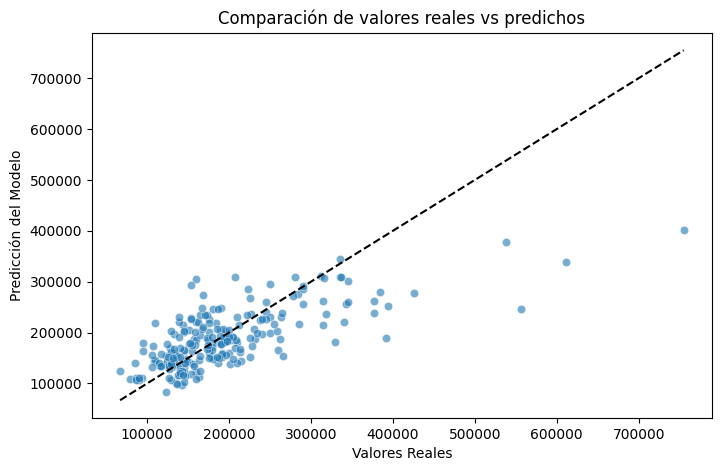

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = modelo_optimizado.predict(sm.add_constant(X_test_filtered))

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE en prueba: {mae_test:.2f}")
print(f"MSE en prueba: {mse_test:.2f}")
print(f"RMSE en prueba: {rmse_test:.2f}")
print(f"R² en prueba: {r2_test:.4f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Predicción del Modelo")
plt.title("Comparación de valores reales vs predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--k")
plt.show()


##### ¿Qué tan bien lo hizo el modelo?
El R² de 0.50 indica que el modelo solo explica el 50% de la variabilidad en los precios de las casas. Esto significa que hay muchas otras variables que afectan el precio y no están bien representadas en el modelo actual.

El MAE y RMSE muestran que, en promedio, el modelo tiene un error de 42,047.73 dólares, lo que es significativo en un mercado inmobiliario. Además, el RMSE de 62,680.27 indica que algunos errores son más grandes y pueden estar afectando la precisión del modelo.

##### ¿Qué medidas usó para determinar la calidad de la predicción?
~ MAE (Error Absoluto Medio) → Mide el error promedio en dólares sin importar si la predicción fue mayor o menor al valor real.


~ MSE (Error Cuadrático Medio) → Penaliza los errores grandes elevándolos al cuadrado, útil para detectar grandes desviaciones.


~ RMSE (Raíz del Error Cuadrático Medio) → Representa el error en las mismas unidades que el precio de la casa, facilitando la     interpretación.


~ R² (Coeficiente de Determinación) → Indica qué porcentaje de la variabilidad del precio de las casas es explicado por el modelo.

### 12.	Discuta sobre la efectividad de los modelos. ¿Cuál lo hizo mejor? ¿Cuál es el mejor modelo para predecir el precio de las casas? Haga los gráficos que crea que le pueden ayudar en la discusión.

                           MAE           MSE          RMSE        R²
Regresión Lineal  42047.730979  3.928816e+09  62680.269302  0.501882
Ridge             41809.192262  3.934527e+09  62725.804303  0.501158
Lasso             42047.656991  3.928808e+09  62680.203098  0.501883


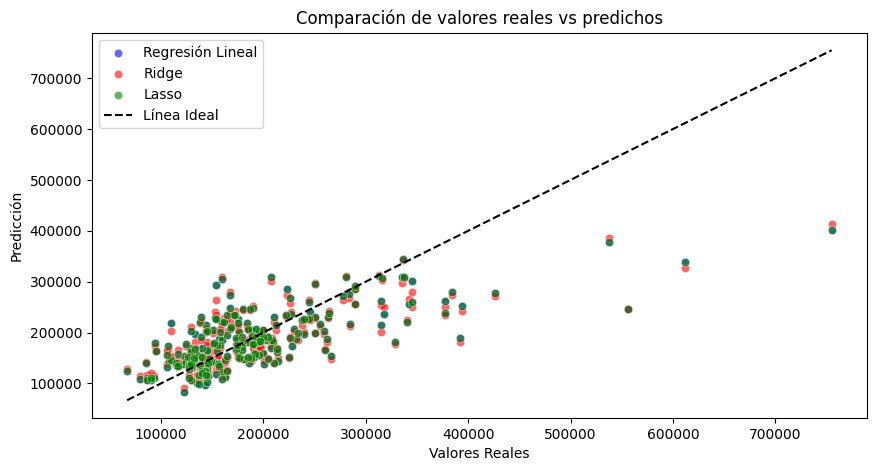

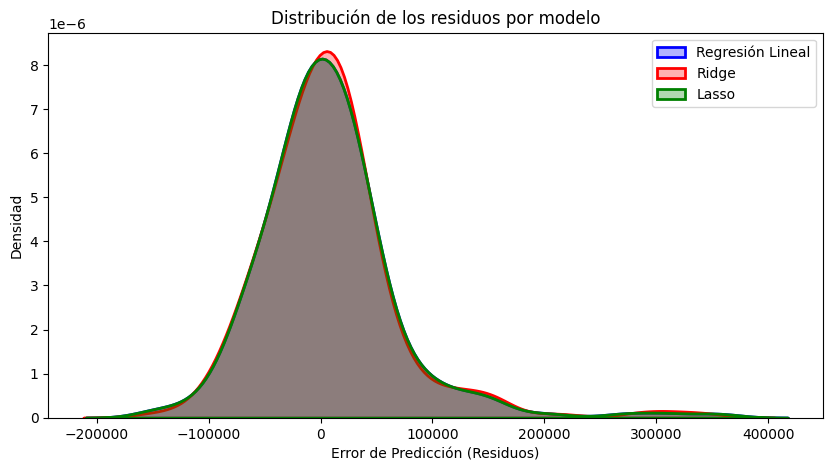

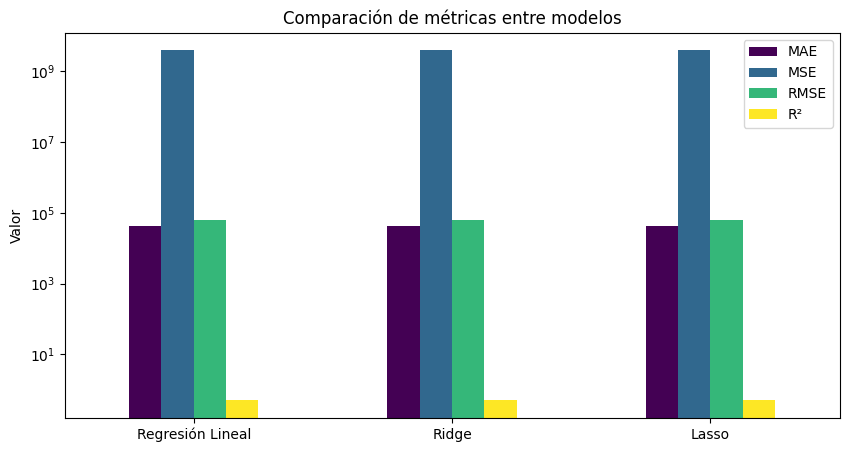

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()
ridge_model = Ridge(alpha=100.0)
lasso_model = Lasso(alpha=0.1)

linear_model.fit(X_train_filtered, y_train)
ridge_model.fit(X_train_filtered, y_train)
lasso_model.fit(X_train_filtered, y_train)

linear_pred = linear_model.predict(X_test_filtered)
ridge_pred = ridge_model.predict(X_test_filtered)
lasso_pred = lasso_model.predict(X_test_filtered)

models = {
    "Regresión Lineal": linear_pred,
    "Ridge": ridge_pred,
    "Lasso": lasso_pred
}

metrics = {}
for name, pred in models.items():
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    metrics[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

plt.figure(figsize=(10,5))
colors = {"Regresión Lineal": "blue", "Ridge": "red", "Lasso": "green"}
for name, pred in models.items():
    sns.scatterplot(x=y_test, y=pred, label=name, alpha=0.6, color=colors[name])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--k", label="Línea Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Predicción")
plt.legend()
plt.title("Comparación de valores reales vs predichos")
plt.show()

plt.figure(figsize=(10,5))
for name, pred in models.items():
    residuos = y_test - pred
    sns.kdeplot(residuos, label=name, fill=True, alpha=0.3, linewidth=2, color=colors[name])
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Densidad")
plt.title("Distribución de los residuos por modelo")
plt.legend()
plt.show()

metrics_df.plot(kind="bar", figsize=(10,5), colormap="viridis", logy=True)
plt.title("Comparación de métricas entre modelos")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.show()


##### ¿Cuál modelo lo hizo mejor?

Ridge fue el mejor modelo porque obtuvo el menor MAE (41,809.19), lo que indica un error promedio más bajo en la predicción del precio de las casas.

##### ¿Cuál es el mejor modelo para predecir el precio de las casas?

Ridge es la mejor opción ya que ofrece mayor estabilidad frente a la multicolinealidad y mantiene un rendimiento similar a la Regresión Lineal sin perder capacidad predictiva.

##### Gráficos utilizados en la discusión:

~ Comparación de valores reales vs predichos

~ Distribución de residuos

~ Comparación de métricas

---------------------------------------------------------
# Proyecto 1 Entrega 2 
-------------------------------------------------------

Importar librerías necesarias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns         


Cargar el dataset de entrenamiento


In [26]:
df = pd.read_csv("train.csv")

Verificar que los datos sean los mismos de la entrega anterior

In [27]:
print("Tamaño del dataset:", df.shape)
print("Columnas disponibles:", df.columns)

Tamaño del dataset: (1460, 81)
Columnas disponibles: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Garage

In [28]:
print("Tamaño del dataset:", df.shape)
print("Columnas disponibles:", list(df.columns)[:10], "...")  # Muestra solo las primeras 10 columnas
print("\nValores nulos por columna:\n", df.isnull().sum().sort_values(ascending=False).head(10))

Tamaño del dataset: (1460, 81)
Columnas disponibles: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities'] ...

Valores nulos por columna:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


 - El dataset contiene 1460 filas y 81 columnas 
 - Lista las primeras 10 columnas para una revisión rapida
 - Muestra las 10 columnas con más valores nulos

 - PoolQC, MiscFeature, Alley, Fence y FireplaceQu tienen muchos valores nulos.
 
 Nota: Como se encuentran varios valores nulos se realizo lo siguiente: 
  - *En lugar de eliminar las columnas con valores nulos, podemos imputar los valores faltantes con el promedio (para valores numéricos) o la moda (para valores categóricos). Esto ayuda a conservar la mayor cantidad de datos posible sin afectar el análisis.*



Imputar Valores Nulos

In [29]:
# Imputar valores numéricos con la media
# Imputar valores categóricos con la moda (valor más frecuente)
# verifica si quedan valores nulos


num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean()))

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("Valores nulos después de la imputación:\n", df.isnull().sum().sum())

Valores nulos después de la imputación:
 0


Visualizar la distribución de precios

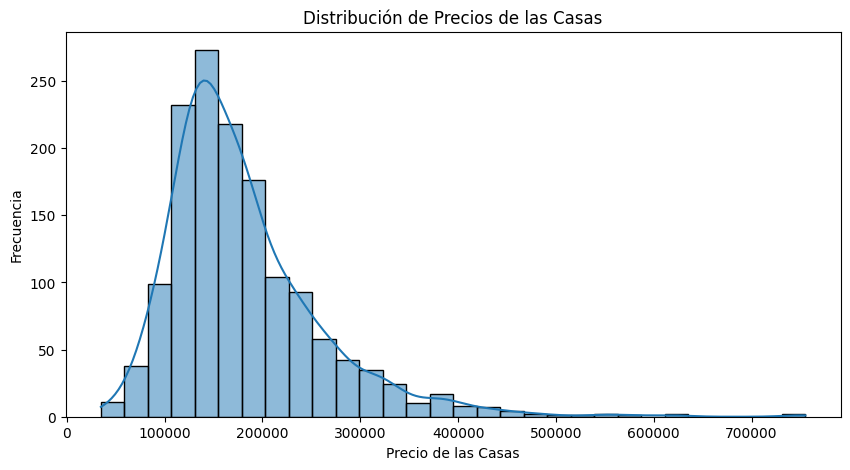

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.xlabel("Precio de las Casas")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de las Casas")
plt.show()

Calcular los percentiles para clasificar las casas

In [31]:
percentil_33 = np.percentile(df["SalePrice"], 33)
percentil_66 = np.percentile(df["SalePrice"], 66)

print("Límite Económicas (P33): "+str(percentil_33))
print("Límite Intermedias (P66):"+ str(percentil_66))

Límite Económicas (P33): 139000.0
Límite Intermedias (P66):189893.00000000006


Crear la nueva variable categórica `PriceCategory`

In [32]:
def categorizar_precio(precio):
    if precio <= percentil_33:
        return "Económica"
    elif precio <= percentil_66:
        return "Intermedia"
    else:
        return "Cara"

df["PriceCategory"] = df["SalePrice"].apply(categorizar_precio)

Mostrar la cantidad de casas en cada categoría

In [33]:
print(df["PriceCategory"].value_counts())


PriceCategory
Cara          497
Económica     483
Intermedia    480
Name: count, dtype: int64


 Mostrar la cantidad de casas en cada categoría

C:\Users\brand\AppData\Local\Temp\ipykernel_26412\948100560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["PriceCategory"], y=df["SalePrice"], palette="Set2")


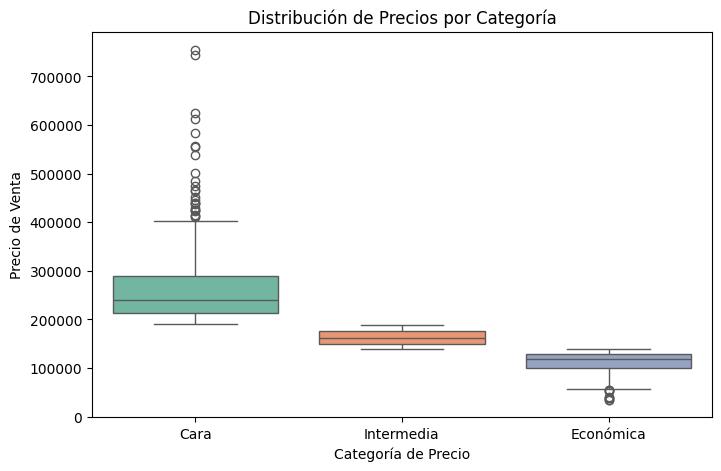

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["PriceCategory"], y=df["SalePrice"], palette="Set2")
plt.xlabel("Categoría de Precio")
plt.ylabel("Precio de Venta")
plt.title("Distribución de Precios por Categoría")
plt.show()

Se guarda el Dataset con la nueva varaible

In [35]:
df.to_csv("train_categorizado.csv", index=False)
print("Archivo guardado: train_categorizado.csv")

Archivo guardado: train_categorizado.csv


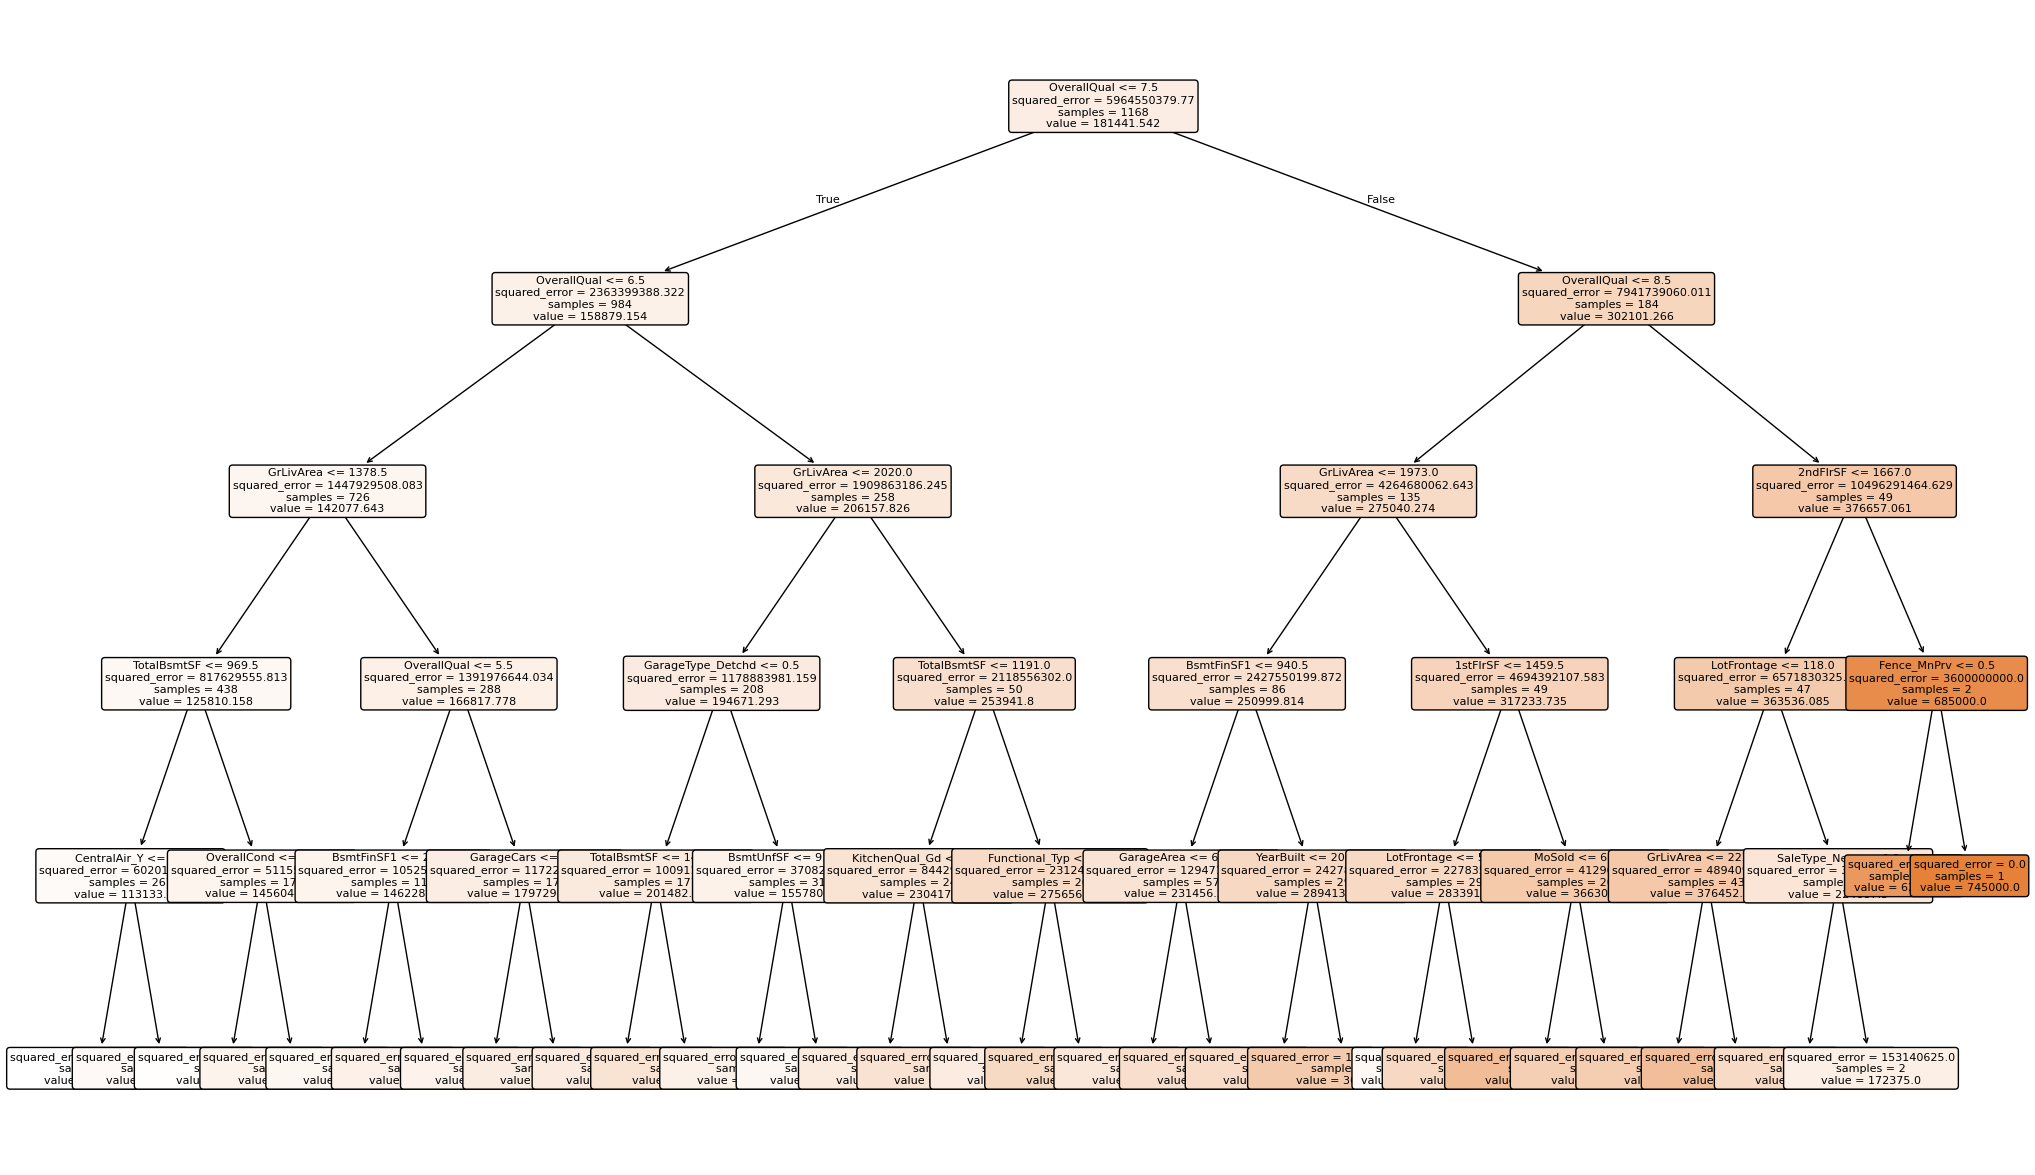

MSE en Entrenamiento: 821017524.4011
MSE en Prueba: 1565821438.8197
R² en Entrenamiento: 0.8624
R² en Prueba: 0.7959
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("train.csv")

X = df.drop(columns=['SalePrice'])  
y = df['SalePrice']  

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

plt.figure(figsize=(25,15))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE en Entrenamiento: {mse_train:.4f}")
print(f"MSE en Prueba: {mse_test:.4f}")
print(f"R² en Entrenamiento: {r2_train:.4f}")
print(f"R² en Prueba: {r2_test:.4f}")

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores Hiperparámetros:", grid_search.best_params_)
